## Database details

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  In the above reference, two datasets were created, using red and white wine samples.
  The inputs include objective tests (e.g. PH values) and the output is based on sensory data
  (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
  between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
  these datasets under a regression approach. The support vector machine model achieved the
  best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
  etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
  analysis procedure).
 
4. Relevant Information:

   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods. 

5. Number of Instances: red wine - 1599; white wine - 4898. 

6. Number of Attributes: 11 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

8. Missing Attribute Values: None


## Idea behind the Notebook

The goal of this notebook is to streamline the Exploratory Data Analysis step of machine learning projects. I would try to automate the various plots we use in EDA phase.

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Acquistion

In [2]:
df_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',delimiter = ';')
df_red['type'] = "red"
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
type                    1599 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [3]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
df_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',delimiter = ';')
df_white['type'] = "white"
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
type                    4898 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 497.5+ KB


In [5]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


## Data Engineering

In [6]:
df = pd.concat([df_red,df_white], axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


### Creating labels from Quality

In [7]:
df['quality_label'] = df['quality'].apply(lambda x: ('low ' if x <=5 else 'medium') if x <=7 else 'high')
df['quality_label'] = df['quality_label'].astype('category')
df['quality_label'].head()

0      low 
1      low 
2      low 
3    medium
4      low 
Name: quality_label, dtype: category
Categories (3, object): [high, low, medium]

### Resuffle

In [8]:
df = df.sample(frac = 1.0, random_state = 101).reset_index(drop = True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,6.8,0.56,0.22,1.8,0.074,15.0,24.0,0.99438,3.40,0.82,11.2,6,red,medium
1,6.4,0.30,0.36,2.0,0.052,18.0,141.0,0.99273,3.38,0.53,10.5,6,white,medium
2,5.9,0.17,0.29,3.1,0.030,32.0,123.0,0.98913,3.41,0.33,13.7,7,white,medium
3,7.0,0.24,0.24,1.8,0.047,29.0,91.0,0.99251,3.30,0.43,9.9,6,white,medium
4,6.4,0.45,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,white,low


### Percentage of missing value

In [9]:
df.isnull().sum()/len(df)*100

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
type                    0.0
quality_label           0.0
dtype: float64

### Ensuring type consistency

In [10]:
#converting to categorical type
df.type = df.type.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null category
quality_label           6497 non-null category
dtypes: category(2), float64(11), int64(1)
memory usage: 622.1 KB


### Numerical and Categorical attributes

In [11]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = list(df.select_dtypes(include=numerics).columns)
df_category = list(df.select_dtypes(include='category').columns)

In [12]:
df_numeric

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [13]:
df_category

['type', 'quality_label']

## Exploratory Data Analysis

### Descriptive Statistics

In [14]:
round(df[df_numeric].describe(),2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00
mean,7.22,0.34,0.32,5.44,0.06,30.53,115.74,0.99,3.22,0.53,10.49,5.82
std,1.30,0.16,0.15,4.76,0.04,17.75,56.52,0.00,0.16,0.15,1.19,0.87
min,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00,3.00
25%,6.40,0.23,0.25,1.80,0.04,17.00,77.00,0.99,3.11,0.43,9.50,5.00
50%,7.00,0.29,0.31,3.00,0.05,29.00,118.00,0.99,3.21,0.51,10.30,6.00
75%,7.70,0.40,0.39,8.10,0.06,41.00,156.00,1.00,3.32,0.60,11.30,6.00
max,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90,9.00


### Histograms and Density Plots

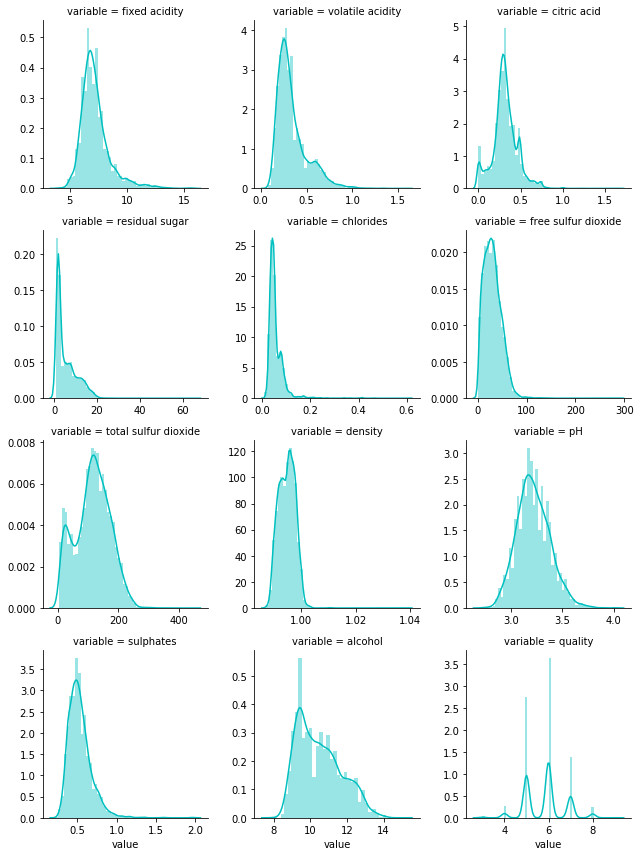

In [15]:
df_fig = pd.melt(df, value_vars=df_numeric)
#melt data for facet grid viz
fig = sns.FacetGrid(df_fig, col="variable",  col_wrap=3, sharex=False, sharey=False)
# col wrap : “Wrap” the column variable at this width, so that the column facets span multiple rows
# sharex; sharey : Controls sharing of properties among x (sharex) or y (sharey) axes
fig = fig.map(sns.distplot, "value", color = 'c')

### Time Series for all numeric variables

This dataset does not have a time dimension.

### Correaltion Matrix

In [16]:
# Compute pairwise correlation of Dataframe's attributes
corr = df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


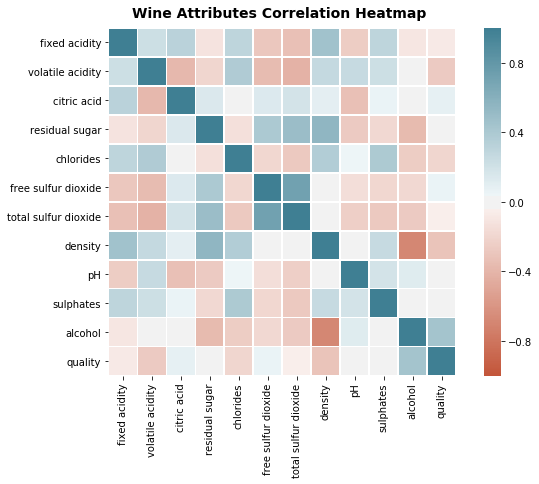

In [17]:
palette = sns.diverging_palette(20, 220, as_cmap=True)

fig, (ax) = plt.subplots(1, 1, figsize=(10,6))
fig.subplots_adjust(top=0.93)
fig.suptitle('Wine Attributes Correlation Heatmap', 
              fontsize=14, 
              fontweight='bold')
sns.heatmap(corr, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 vmin = -1.0,
                 vmax = 1.0,
                 cmap=palette, # Color Map.
                 square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=False, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.5)

### Pair Plots

A pairs plot allows us to see both distribution of single variables and relationships between two variables. 

The following variables seem to be of most interest for pair plots:
1. residual sugar
2. total sulfur dioxide
3. density
4. alcohol
5. quality

Text(0.5, 1.01, 'Wine Attributes Pair Plots (Type)')

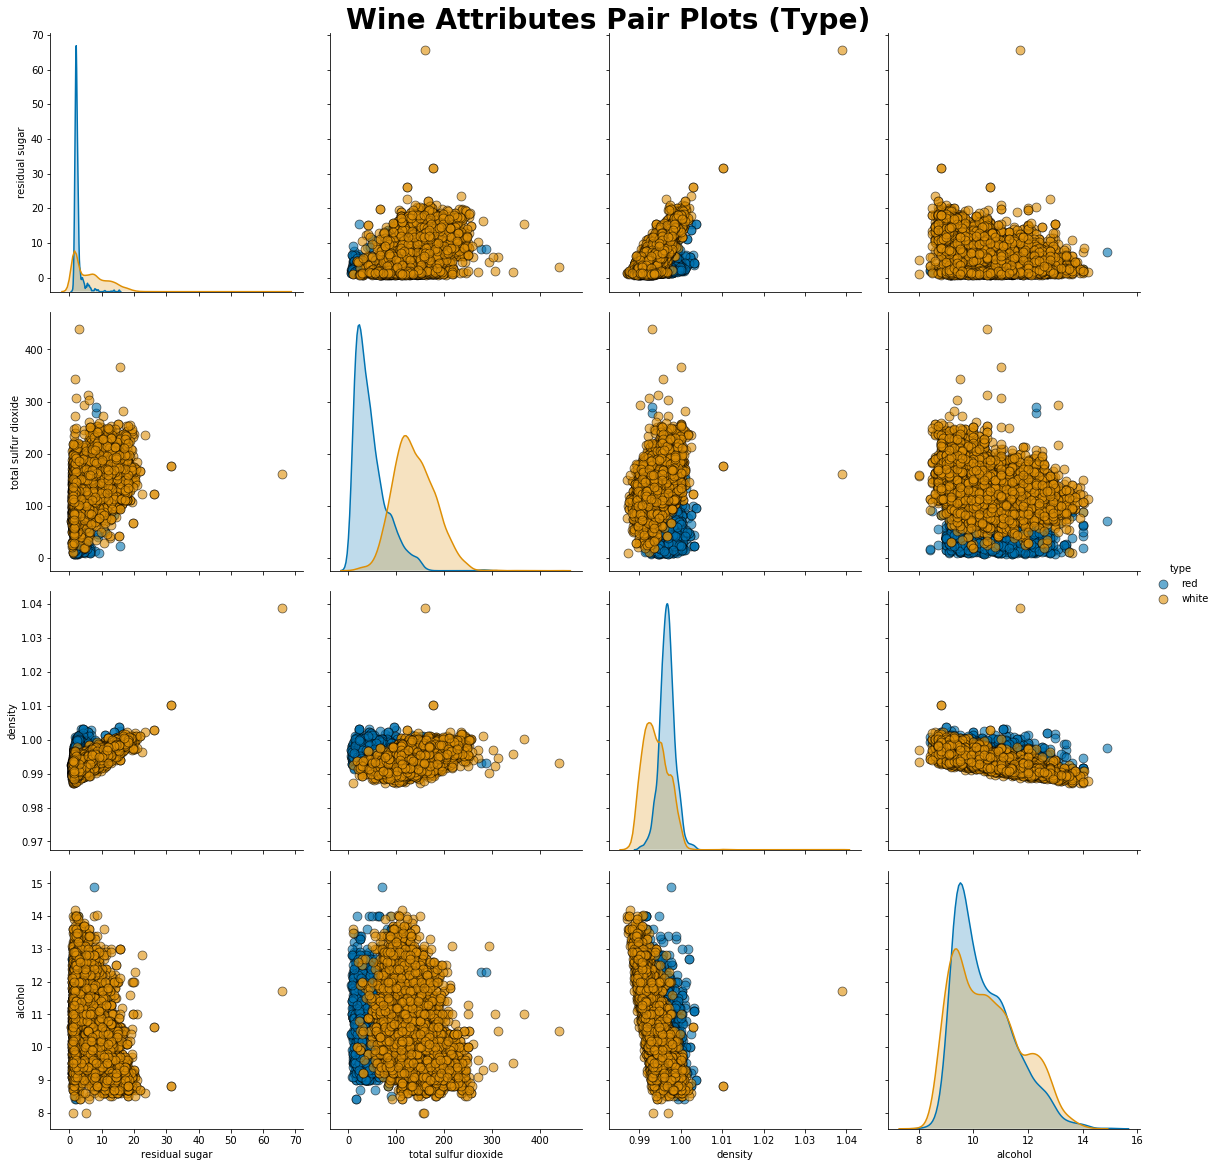

In [18]:
df_pairplot = ['residual sugar',
 'total sulfur dioxide',
 'density',
  'alcohol',
  'type']

sns.pairplot(df[df_pairplot], hue = "type",diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4, palette = 'colorblind')

plt.suptitle('Wine Attributes Pair Plots (Type)',
            y = 1.01,
            fontsize = 28,
            fontweight = 'bold')

Text(0.5, 1.01, 'Wine Attributes Pair Plots (Quality)')

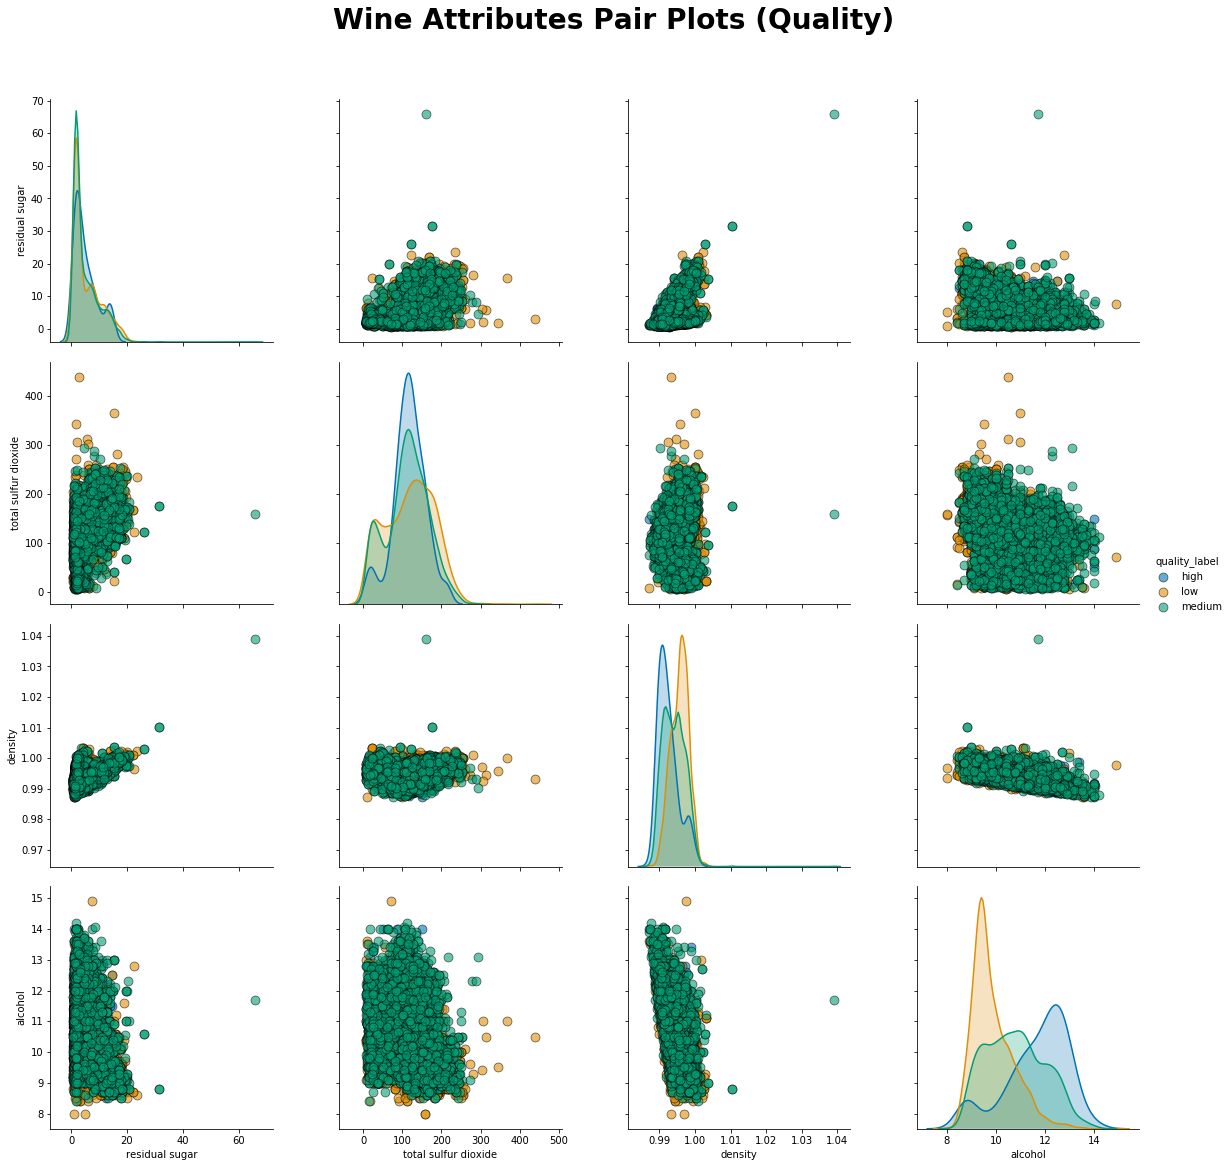

In [19]:
df_pairplot = ['residual sugar',
 'total sulfur dioxide',
 'density',
  'alcohol',
  'quality_label']

pp = sns.pairplot(df[df_pairplot], diag_kws=dict(shade=True), hue = "quality_label",
             diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             #kind = "reg", # to plot reg lines for scatter plots
             height = 4, palette = 'colorblind')

fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('Wine Attributes Pair Plots (Quality)',
            y = 1.01,
            fontsize = 28,
            fontweight = 'bold')

### 2D Mixed Attributes

Comparison of volatile acidity by type of wine

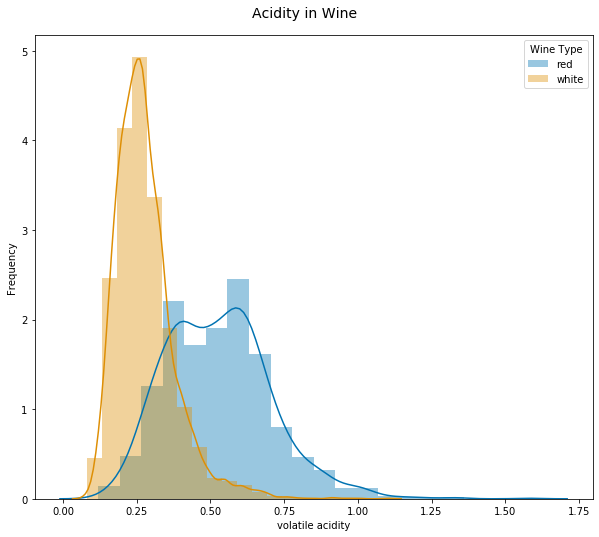

In [20]:
fig = plt.figure(figsize=(10,8))
title = fig.suptitle("Acidity in Wine", fontsize=14)
fig.subplots_adjust(top=0.93, wspace=0.3)

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Volatile Acidity")
ax.set_ylabel("Frequency") 

g = sns.FacetGrid(data=df, 
                  hue='type', 
                  palette='colorblind')

g.map(sns.distplot, 'volatile acidity', 
      kde=True, bins=20, ax=ax)

ax.legend(title='Wine Type')
plt.close(2)

### Box and Violin Plots

Text(0, 0.5, 'Wine Alcohol Content')

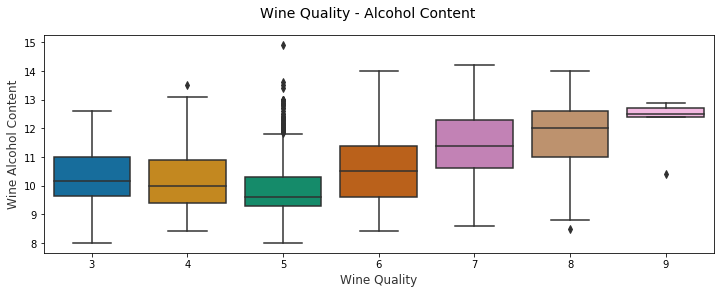

In [21]:
fig, (ax) = plt.subplots(1, 1, figsize=(12, 4))
fig.suptitle('Wine Quality - Alcohol Content', fontsize=14)

sns.boxplot(data=df,
               x="quality", 
               y="alcohol",   
               ax=ax,
               palette = "colorblind")

ax.set_xlabel("Wine Quality",size=12,alpha=0.8)
ax.set_ylabel("Wine Alcohol Content",size=12,alpha=0.8)

Text(0, 0.5, 'Wine Alcohol Content')

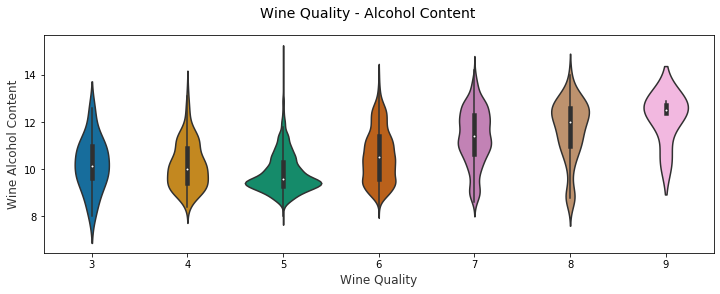

In [22]:
fig, (ax) = plt.subplots(1, 1, figsize=(12, 4))
fig.suptitle('Wine Quality - Alcohol Content', fontsize=14)

sns.violinplot(data=df,
               x="quality", 
               y="alcohol",   
               ax=ax,
               palette = "colorblind")

ax.set_xlabel("Wine Quality",size=12,alpha=0.8)
ax.set_ylabel("Wine Alcohol Content",size=12,alpha=0.8)

Text(0, 0.5, 'Wine Alcohol Content')

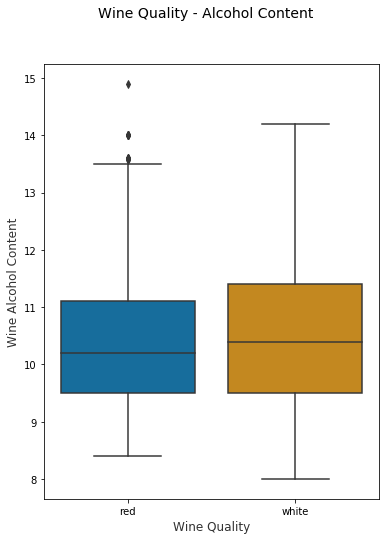

In [23]:
fig, (ax) = plt.subplots(1, 1, figsize=(6, 8))
fig.suptitle('Wine Quality - Alcohol Content', fontsize=14)

sns.boxplot(data=df,
               x="type", 
               y="alcohol",   
               ax=ax,
               palette = "colorblind")

ax.set_xlabel("Wine Quality",size=12,alpha=0.8)
ax.set_ylabel("Wine Alcohol Content",size=12,alpha=0.8)

Text(0, 0.5, 'Wine Alcohol Content')

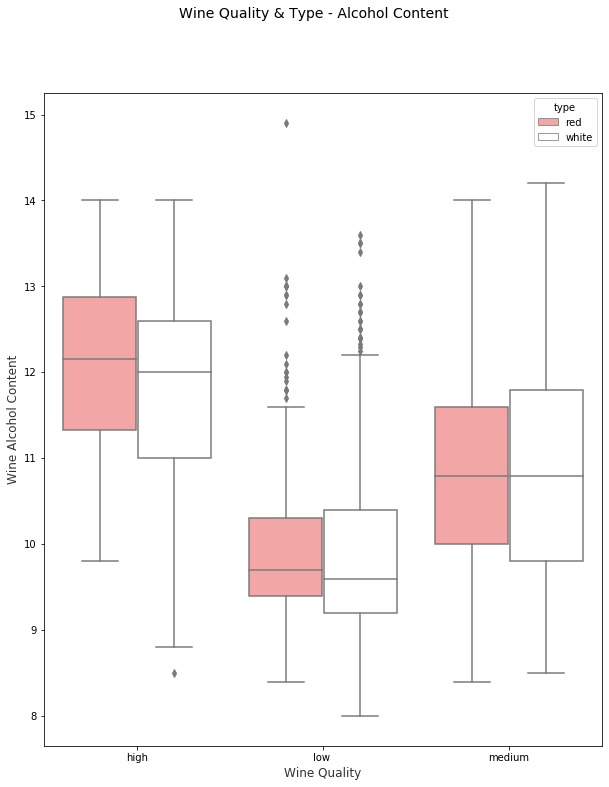

In [24]:
fig, (ax) = plt.subplots(1, 1, figsize=(10, 12))
fig.suptitle('Wine Quality & Type - Alcohol Content', fontsize=14)

sns.boxplot(data=df,
               x="quality_label", 
               y="alcohol", 
               hue = "type",
               ax=ax,
               palette={"red": "#FF9999",
                     "white": "white"}, )

ax.set_xlabel("Wine Quality",size=12,alpha=0.8)
ax.set_ylabel("Wine Alcohol Content",size=12,alpha=0.8)

## Model Developement

### Classification for quality label

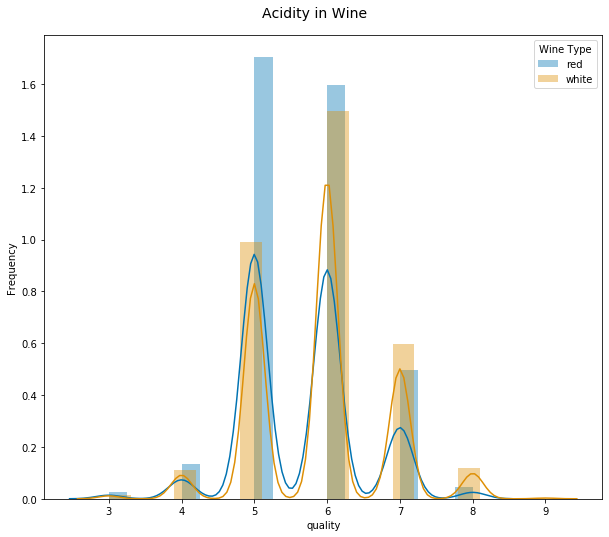

In [25]:
fig = plt.figure(figsize=(10,8))
title = fig.suptitle("Acidity in Wine", fontsize=14)
fig.subplots_adjust(top=0.93, wspace=0.3)

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Volatile Acidity")
ax.set_ylabel("Frequency") 

g = sns.FacetGrid(data=df, 
                  hue='type', 
                  palette='colorblind')

g.map(sns.distplot, 'quality', 
      kde=True, bins=20, ax=ax)

ax.legend(title='Wine Type')
plt.close(2)

#### XGBoost

##### Pre processing data for modelling

In [26]:
df_xgb = df.copy()

#DataFrame.dtypes for data must be int, float or bool for DMatrix
df_xgb['quality_label'] = df_xgb['quality'].apply(lambda x: 1 if x <=7 else 0)
df_xgb['type'] = df_xgb['type'].apply(lambda x: 0 if x =="red" else 1)
df_xgb['type'] = df_xgb['type'].astype('bool')
df_xgb['quality_label'] = df_xgb['quality_label'].astype('bool')
df_xgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null bool
quality_label           6497 non-null bool
dtypes: bool(2), float64(11), int64(1)
memory usage: 621.9 KB


In [27]:
from sklearn.model_selection import train_test_split
X = df_xgb[['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'type']]
y = df_xgb[['quality_label']]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                         test_size=0.3, 
                                                         random_state=101,
                                                         stratify = y)

In [28]:
import xgboost as xgb

In [29]:
#loading pandas dataframe into DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

##### Booster parameters

In [30]:
param = {'max_depth': 3, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'
param

{'max_depth': 3,
 'eta': 1,
 'objective': 'binary:logistic',
 'nthread': 4,
 'eval_metric': 'auc'}

##### Validations set to watch performance

In [31]:
evallist = [(dtest, 'eval'), (dtrain, 'train')]
evallist

[(<xgboost.core.DMatrix at 0x245ff848ba8>, 'eval'),
 (<xgboost.core.DMatrix at 0x245ff848be0>, 'train')]

##### Training

In [32]:
num_round = 10
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-auc:0.747228	train-auc:0.720581
[1]	eval-auc:0.833345	train-auc:0.841084
[2]	eval-auc:0.882866	train-auc:0.881326
[3]	eval-auc:0.888092	train-auc:0.901957
[4]	eval-auc:0.898453	train-auc:0.907733
[5]	eval-auc:0.90016	train-auc:0.91625
[6]	eval-auc:0.900017	train-auc:0.928284
[7]	eval-auc:0.898036	train-auc:0.931974
[8]	eval-auc:0.900228	train-auc:0.934007
[9]	eval-auc:0.894375	train-auc:0.948707


##### Prediction

In [33]:
ypred = bst.predict(dtest)

Confusion Matrix from sklearn

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test.values, (ypred > 0.5))

array([[   6,   53],
       [  10, 1881]], dtype=int64)

Pandas generated Confusion Matrix

In [35]:
df_demo = {'y_Predicted': list((ypred > 0.5)),
        'y_Actual':    list(y_test['quality_label']) }
target_names = ['class 0', 'class 1', 'class 2']
df_cm = pd.DataFrame(df_demo, columns=['y_Actual','y_Predicted'])
pd.crosstab(df_cm['y_Actual'], df_cm['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])


Predicted,False,True
Actual,,
False,6,53
True,10,1881


Classification Report

In [36]:
from sklearn.metrics import classification_report
target_names = ['High', 'Normal']
print(classification_report(y_test.values, (ypred > 0.5), target_names=target_names))

              precision    recall  f1-score   support

        High       0.38      0.10      0.16        59
      Normal       0.97      0.99      0.98      1891

    accuracy                           0.97      1950
   macro avg       0.67      0.55      0.57      1950
weighted avg       0.95      0.97      0.96      1950



Model Accuracy Percentage

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test.values, (ypred > 0.5))*100

96.76923076923077

##### Interpretability 

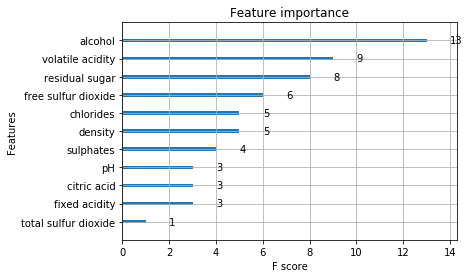

In [38]:
xgb.plot_importance(bst)